# Plitke neuronske mreže -- intuicija

<center><img src="Images/V3_banner.png" width="700" height="700"/></center>

U ovoj vježbi cilj je vidjeti kako je nastala sa matematičke perspektive neuronska mreža, te dobiti intuiciju što znači dodati neuron u neuronskoj mreži. Tijekom cijelog postupka koristiti će **PyTorch** kako bi kasnije tranzicija na praktične neuronske mreže bila laka. Za početak potrebno je definirati *engl. Artificial Neural Network (ANN)* odnosno neuronsku mrežu.

**Neuronska mreža** je računalni model inspiriran strukturom i funkcioniranjem ljudskog mozga. Trenutno je najpopularnija metoda u području strojnog učenja zbog različitih mehanizama koji omogućuju široku primjenu gdje nerjetko ostvaraju najbolje rezultate. Unatoč brojnim mehanizmimima, najmanji gradivni blok neuronske mreže -- neuron -- reprezentiran je u računalnom modelu pomoću tri ključne komponente:

* Ulaznog podataka, koji može biti stvarni podatak ili izlaz prethodnog neurona.
* Aktivacijske funkcije, funkcije koja mijenja vrijednost neurona.
* Izlaznog podatka, potatka koji može predstavljati konačni izlaz/rezultat ili ulaz u idući neuron.

Najjednostavni oblik neuronske mreže tipično korišten za stvaranje konačnog izlaza jest **Perceptron**, odnosno višeslojni perceptron (*engl. Multilayer perceptron*) ([Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron)). Prikaz jednog višeslojnog perceptrona može se vidjeti i na prikazanoj slici.

---

### Skup podataka Bike-rental 

<center><img src="Images/V3_bike_rental.png" width="700" height="700"/></center>

Podaci kojima će biti centar ove vježbe mogu se pronaći na Kaggle natjecanju [bike-rental dataset](https://www.kaggle.com/datasets/archit9406/bike-sharing). Skup podataka centriran je oko iznajmljivanja bicikli u Washington D.C.-u pružajući, osim broja iznajmljenih bicikli, i informacije koje karakteriziraiju dan za koji su se iznajmili bicikli. Problem koji se riješava jest predviđanje broja iznajmljenih bicikala u ovisnosti o karakteristikama dana.

Za početak, potrebno je stvoriti **Dataloader** u duhu **PyTorch** programske knjižice. Dataloader, kao što mu ima kaže zaslužan je za učitavanje i pripremu podataka za daljnje korištenje i treniranje modela. U sklopu ove vježbe priložen je programski kod u datoteci **dataloader.py** koji implementira klasu **bikeRentalDataset**. Kako bi se klasa moga koristiti untar PyTorch dataloadera, ona mora mora imati implementirane tri metode:

* \__init__  -- metoda koja inicijalizira klasu te se odlikuje učitavanjem podataka i incijalizacijom komponenti koje će se koristiti u složenijim primjerima poput koeficjenata normalizacije, metode augmentacije, dozvole upotrebe određenih ulaza ili micanje istih. Rezultat ove metode jesti lista podataka koja je indeksirana gdje svaki element liste predstavlja jedan uzorak/jedan podataka unutar skupa podataka.
* \__getitem__ -- metoda koja vraća jedan podatak iz skupa podataka. Bitno je da vrijednosti koje metoda vraća su *torch.Tensori* kako bi se isti mogli odmah koristiti za treniranje modela i bili komaptibilni sa **Dataloader** klasom iz PyTorcha koja je pruža puno pogodnosti poput različitih politika sampliranja i vraća predefiniranog broja podataka odjednom (*batch*). Više o Dataloader-u kao klasi može se pronaći na sljedećoj [poveznici](https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html).
* \__len__ -- jednostavna metoda koja vraća ukupni broj podataka/uzoraka u skupu podataka.

U ovoj vježbi implementirati će se komplenta klasa sa sljedećim karakteristikama:

* Skup podataka prima točno jednu ulaznu oznaku i točno jednu izlaznu oznaku.
* Predstavlja minimalni radni primjer, što znači da nema nikakvih dodataka poput augmentacije ili normalizacije podataka.
* Učitavač podataka - dataloader, podešen je na način da uvijek vraća samo jedan podatak.

Međutim, svaki učitavač podataka prati istu logiku implementacije te na kraju ove vježbe, osim intuicije iza plitkih neuronskih mreža, znati ćete i kreirati vlasiti učitavač podataka u duhu programske knjižice PyTorch.

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Za početak potrebno je provjeriti koje oznake postoje u danom skupu podataka, koliko podataka imamo i istražiti sa čime zapravo radimo kako bi mogli odabrati jedan ulazni i jedan izlazni podatak. Svaki skup podataka ima i korisne i beskorisne informacije (šum), na dizajneru rješenja jest da odluči koji podaci su korisni, a koji beskorisni. U sljedećoj programskoj ćeliji implementirajte programski kod koristeći resurse ove vježbe kako bi prikupili inicijalne informacije o skupu podataka **bikeRental** te odgovorite na sljedeća pitanja:

* Koji je najefikasniji način za selekciju korisnih ulaznih podataka?
* Jesu li skup podataka potpun - imamo li problema sa nepotpunim podacima?
* Kako je u skupu podataka označen podatak koji je potrebno predvidjeti?
* Koji je najkorisniji ulazni podatak?

Podaci se nalaze u datoteci: **"Notebooks/Skripte/Vjezba3/day_bikes_rental.csv"**

In [4]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Vaš kod ovdje #TODO
from Skripte.Vjezba3.dataloader import inspect_dataset
inspect_dataset("Skripte/Vjezba3/day_bikes_rental.csv")

Label      Udio     Missing        Vrijednosti(5)
*****************************************************************
instant: 731 / 731 (missing: 0) (Vales: [1 2 3 4 5])
dteday: 731 / 731 (missing: 0) (Vales: ['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'])
season: 731 / 731 (missing: 0) (Vales: [1 2 3 4])
yr: 731 / 731 (missing: 0) (Vales: [0 1])
mnth: 731 / 731 (missing: 0) (Vales: [1 2 3 4 5])
holiday: 731 / 731 (missing: 0) (Vales: [0 1])
weekday: 731 / 731 (missing: 0) (Vales: [6 0 1 2 3])
workingday: 731 / 731 (missing: 0) (Vales: [0 1])
weathersit: 731 / 731 (missing: 0) (Vales: [2 1 3])
temp: 731 / 731 (missing: 0) (Vales: [0.344167 0.363478 0.196364 0.2      0.226957])
atemp: 731 / 731 (missing: 0) (Vales: [0.363625 0.353739 0.189405 0.212122 0.22927 ])
hum: 731 / 731 (missing: 0) (Vales: [0.805833 0.696087 0.437273 0.590435 0.436957])
windspeed: 731 / 731 (missing: 0) (Vales: [0.160446 0.248539 0.248309 0.160296 0.1869  ])
casual: 731 / 731 (missing: 0) (Val

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Proučite programski kod u skripti **dataloader.py**, posebno klasu *bikeRentalDataset* te *ordinary_dataloader* ,te izvršite/odgovorite na iduća pitanja:

* Koje su nužne funkcije za implementirati dataset u svrhu korištenja unutar PyTorch programskog okruženja.
* Koja je uloga Dataloadera, a koja Dataseta?
* Provjerite kako radi pogramski kod za različite ulazne i izlazne varijable te razmislite koje su potencijalne
nadogradnje navedenog Dataseta te koje su primjene ovako dizajniranog dataseta.

In [2]:
# Knjižnice
from Skripte.Vjezba3.dataloader import bikeRentalDataset, ordinary_dataloader

# Dataset
_dataset = bikeRentalDataset(path_to_csv = "Skripte/Vjezba3/day_bikes_rental.csv",
                             input_label = "season",
                             target_label = "cnt")

# Dataloader
_dataloader = ordinary_dataloader(dataset = _dataset,
                                 batch_size = 1)

# Iterirajmo kroz nekliko podataka
for _i, _item in enumerate(_dataloader):
    print(_item)
    if _i == 10:
        break

[tensor([[2.]]), tensor([7424.])]
[tensor([[3.]]), tensor([3285.])]
[tensor([[1.]]), tensor([1501.])]
[tensor([[2.]]), tensor([2121.])]
[tensor([[4.]]), tensor([5191.])]
[tensor([[2.]]), tensor([2425.])]
[tensor([[4.]]), tensor([5424.])]
[tensor([[4.]]), tensor([5315.])]
[tensor([[1.]]), tensor([1550.])]
[tensor([[2.]]), tensor([5260.])]
[tensor([[1.]]), tensor([2209.])]


---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Razmislite o načinima kako odrediti koji su najkorisnije informacije među podacima za predvidjeti broj iznajmljenih bicikala. 
Idući programski kod za vas crta ovisnost dviju varijabli te mjeri njihovu korelaciju. Proučite više o korelaciji te odgovorite na iduća pitanja:

* Što znači korelacija 1, -1 ili 0 između dviju varijabli?
* Koja je varijabla najviše a koja najmanje korelirana?
* Koja je mana, odnosno na koje pitanje dani programski kod ne odgovara? Pomoć: što ako izlaz ovisi o kombinaciji dviju varijabli?

Više informacija o korelaciji može se pronaći na idućim poveznicama [Wiki](https://en.wikipedia.org/wiki/Correlation), [Ilustrativno](https://www.scribbr.com/statistics/correlation-coefficient/).

In [5]:
# Knjižnice
from Skripte.Vjezba3.plot import create_bike_correlation_widget

# Widget start
create_bike_correlation_widget(path_to_csv = "Skripte/Vjezba3/day_bikes_rental.csv")

---

## Izrada modela 

U prethodnoj vježbi bilo je potrebno implementirati pravac pomoću knjižnice PyTorch. U skripti **Notebooks/Skripte/Vjezba3/models.py** isto je učinjeno unutar klase **model_1_1_1**.

Svaka implementacija modela u sklopu PyTorch programske knjižice zahtjeva implementaciju dviju metoda: *\__init__* i *forward*. Dok init metoda služi za incijalizaciju slojeva i parametara, forward metoda vrši izračun modela i iskorištava slojeve. Premda ovaj jednostavni primjer nema puno slojeva, zorno prikazije i kreiranje bilo kakvog složenijeg modela u PyTorchu.

---

<font color='green'>
    
## Primjer

<left><img src="Images/Primjer.png" width="70" height="70"/></left>

</font>

Proučite iduće programske kodove koji omogućuju inspekciju modela.

In [4]:
# Knjižnice
from Skripte.Vjezba3.models import *

# Kreiranje modela
_model = model_1_1_1(theta0_init = 0.5,
                     theta1_init = 1.2)

In [5]:
# Ispis osnovnog opisa modela (inspekcija broja parametara)
print_model_summary(model = _model,
                   device = "cpu",
                   input_dim = (1,1))

Layer (type (var_name))                  Input Shape      Output Shape     Param #          Trainable
model_1_1_1 (model_1_1_1)                [1, 1]           [1, 1]           2                True
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

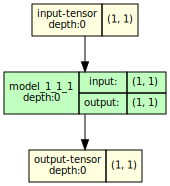

In [6]:
# Iscrtavanje grafa modela (inspekcija povezanosti slojeva)
plot_graph(model = _model,
           device = "cpu",
           input_dim = (1,1))

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Idući kod implementira PyTorch model. Vaš je zadatak mijenjajući parametre $\theta0$ i $\theta1$ postići čim nižu vrijednost metrike MSE. Istovremeno proučite i odgovorite na pitenje: Koje je uloga normalizacije podataka? te Kako je normalizacija implementirana u priloženom programskom kodu? 

Više o normalizaciji možete pronaći na idućoj [poveznici](https://www.datacamp.com/tutorial/normalization-in-machine-learning).

In [ ]:
# Knjižnice
from Skripte.Vjezba3.plot import create_line_fit_widget
create_line_fit_widget()

---

## Aktivacija "neurona"

Da bi model prezentiran u prethodnim zadacima i primjerima postao neuronskom mrežom, nedostaju mu dvije komponente:

* Više slojeva, premda diskutabilno, ali jedan neuron nije mreža,
* Aktivacijska funkcija koja ima ulogu mijenjanja ulaznog podatka.

**Aktivacijske funkcije** su važne jer uvode nelinearnost, omogućujući neuronskim mrežama da uče složene, nelinearne obrasce u podacima. Bez njih, neuronska mreža bi bila ograničena na jednostavne linearne odnose, poput jednoslojnog modela, bez obzira na to koliko slojeva ima. Drugim riječima rezulate kombinacije više linearnih funkcija jest opet linearna funkcija, što ne doprinosi učenju složenih relacija. Također su ključne za omogućavanje hijerarhijskog učenja u dubokim mrežama i djeluju kao "univerzalni aproksimator funkcije". ([Više o temi](https://towardsdatascience.com/the-importance-and-reasoning-behind-activation-functions-4dc00e74db41/)) 

Postoji veliki broj aktivacijskih funkcija, ali najpopularnije su sljdeće:

* Rectified Linear Unit (ReLU):

$$\mathrm{ReLU}(x) = \max(0, x)$$

* Tanh:
$$\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$
  
* Sigmoid:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

* Softmax:

$$\mathrm{softmax}(z)_i=\frac{e^{z_i-\max_j z_j}}{\sum_{j} e^{z_j-\max_j z_j}}$$

Na sljedećoj slici prikazan je veliki broj [aktivacijskih funkcija](https://vinija.ai/concepts/activation/), od kojih se većina i ne koristi u praksi:

<center><img src="Images/V3_aktivacijske_funkcije.png" width="700" height="700"/></center>

Naime, aktivacijska funkcija moa biti derivabilna (sjetite se gradijentnog spusta) i komputacijski jednostavna jer će se računati veliki broj puta.

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Pokrenite idući kod i provjerite kako odabir aktivacijske funkcije utječe na konačni rezultat modela -- sada već neuronske mreže. Iznesite svojstva svake funkcije, koje su prednost i mane jedne nad drugima. Zabilježite svoja opažanja.

In [7]:
# Knjižnice
from Skripte.Vjezba3.plot import create_line_fit_with_activation_widget
create_line_fit_with_activation_widget()

In [9]:
# Iscrajmo graf sa nekom aktivacijskom funkcijom
# Knjižnice
from Skripte.Vjezba3.models import *

# Kreiranje modela
_model = model_1_1_1(theta0_init = 0.5,
                     theta1_init = 1.2,
                     activation_function = "Sigmoid")

# Ispis osnovnog opisa modela (inspekcija broja parametara)
print_model_summary(model = _model,
                   device = "cpu",
                   input_dim = (1,1))

Layer (type (var_name))                  Input Shape      Output Shape     Param #          Trainable
model_1_1_1 (model_1_1_1)                [1, 1]           [1, 1]           2                True
├─Sigmoid (activation)                   [1, 1]           [1, 1]           --               --
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

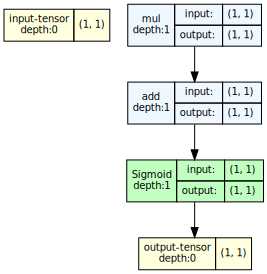

In [10]:
# Iscrtavanje grafa modela (inspekcija povezanosti slojeva)
plot_graph(model = _model,
           device = "cpu",
           input_dim = (1,1))

---

## Više neurona

Sam naziv neuronska mreža upućuje na više neurona koji zajedno doprinose boljoj predikciji. Tako primjerice možemo kreirati iduću neuronsku mrežu

<center><img src="Images/V3_neural_network.png" width="700" height="700"/></center>

Izračuni svakog skrivenog neurona je sljedeći:

   
$
h_1 = \theta_{11} + \theta_{10} \cdot x
$

$
h_2 = \theta_{21} + \theta_{20} \cdot x
$

$
h_3 = \theta_{31} + \theta_{30} \cdot x
$

Potom vršimo aktivaciju (primjerice ReLU):

$
a_1 = ReLU(_h1)
$

$
a_2 = ReLU(_h2)
$

$
a_3 = ReLU(_h3)
$

Na kraju računamo izlaz

$
y = \phi_0 +  \phi_1 \cdot a_1 + \phi_2 \cdot a_2 + \phi_3 \cdot a_3 
$

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Idući prokramski kod omogućava pregled konačnog izgleda te inspekciju svakog koraka navedene neuronske mreže. Vaš je zadatak:

* Dovršite implmentaciju neuronske mreže. **(Klasa model_1_3_1 )**!
* Provjerite koliki je broj parametara neuronske mreže te protumačite njezin graf.
* Pokušajte stvoriti bolju neuronsku mrežu i odgovorite na pitanje je li aktivacijska funkcija nužna?
* Stvorite si intuiciju oko relacije parametara i konačne funkcije.

In [11]:
# Iscrajmo graf sa nekom aktivacijskom funkcijom
# Knjižnice
from Skripte.Vjezba3.models import *


#  Postavljanje parametara
_theta_init = np.array([[0.0, 1.0],
                       [0.5, 2.0],
                       [-0.3, -1.0]], dtype=float)   # (3,2)

_psi_init   = np.array([1.0, 0.8, -0.2, 0.5], dtype=float)  # (4,)

_model = model_1_3_1(theta_init_matrix = _theta_init,
                      psi_init_matrix = _psi_init,
                      activation_function = "Sigmoid")

# Ispis osnovnog opisa modela (inspekcija broja parametara)
print_model_summary(model = _model,
                   device = "cpu",
                   input_dim = (1,1))

Layer (type (var_name))                  Input Shape      Output Shape     Param #          Trainable
model_1_3_1 (model_1_3_1)                [1, 1]           [1, 1]           10               True
├─Sigmoid (activation1)                  [1, 1]           [1, 1]           --               --
├─Sigmoid (activation2)                  [1, 1]           [1, 1]           --               --
├─Sigmoid (activation3)                  [1, 1]           [1, 1]           --               --
Total params: 10
Trainable params: 10
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

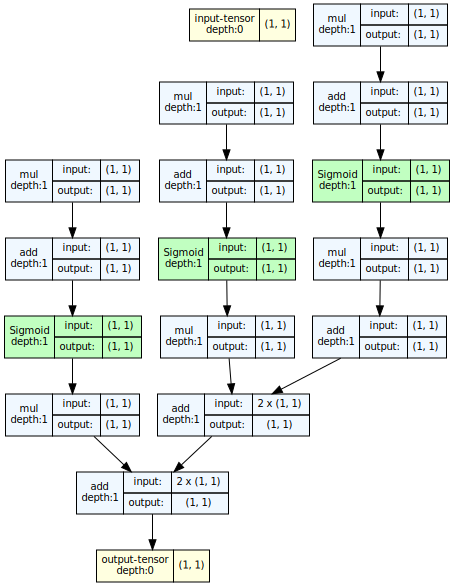

In [12]:
# Iscrtavanje grafa modela (inspekcija povezanosti slojeva)
plot_graph(model = _model,
           device = "cpu",
           input_dim = (1,1))

In [6]:
# Učitavanje programke knjižice
from Skripte.Vjezba3.plot import create_model_1_3_1_widget
create_model_1_3_1_widget()

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Steknite intuiciju oko parametara funkcije.

In [2]:
from Skripte.Vjezba3.plot import create_model_1_3_1_component_plots_widget
create_model_1_3_1_component_plots_widget(device="cpu")

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Kreirajte dataloader koji vraća dva ulazna podataka i jedan izlazan. Trenutni dataloader vraća jedan ulazni i jedan izlazni podatak.